In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
inter = -0.3
slope = 0.5
mu = 0
var = 0.04
sigma = np.sqrt(var)
beta = 1/var

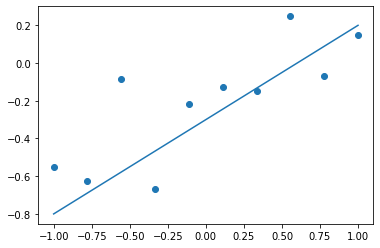

In [3]:
x_n = np.linspace(-1, 1, 10)
y = []
for i in x_n:
  y.append(slope*i + inter + np.random.normal(mu, sigma))

plt.scatter(x_n, y)
plt.plot(x_n, slope*x_n + inter)
plt.show()

In [4]:
def likelihood(x, y, w0, w1):
  k = np.sqrt(2*np.pi) * sigma
  return k * np.exp(-0.5 * ((y - (w0 + w1*x))/sigma)**2)

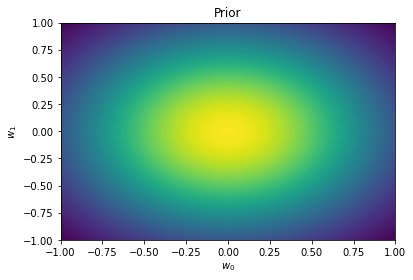

In [5]:
w0, w1 = np.meshgrid(np.linspace(-1, 1, 1000), np.linspace(-1, 1, 1000))
gr_0 = stats.norm.pdf(w0, 0, np.sqrt(0.5))
gr_1 = stats.norm.pdf(w1, 0, np.sqrt(0.5))
prior = gr_0 * gr_1
plt.contourf(w0, w1, prior, 100)
plt.title('Prior')
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.show()

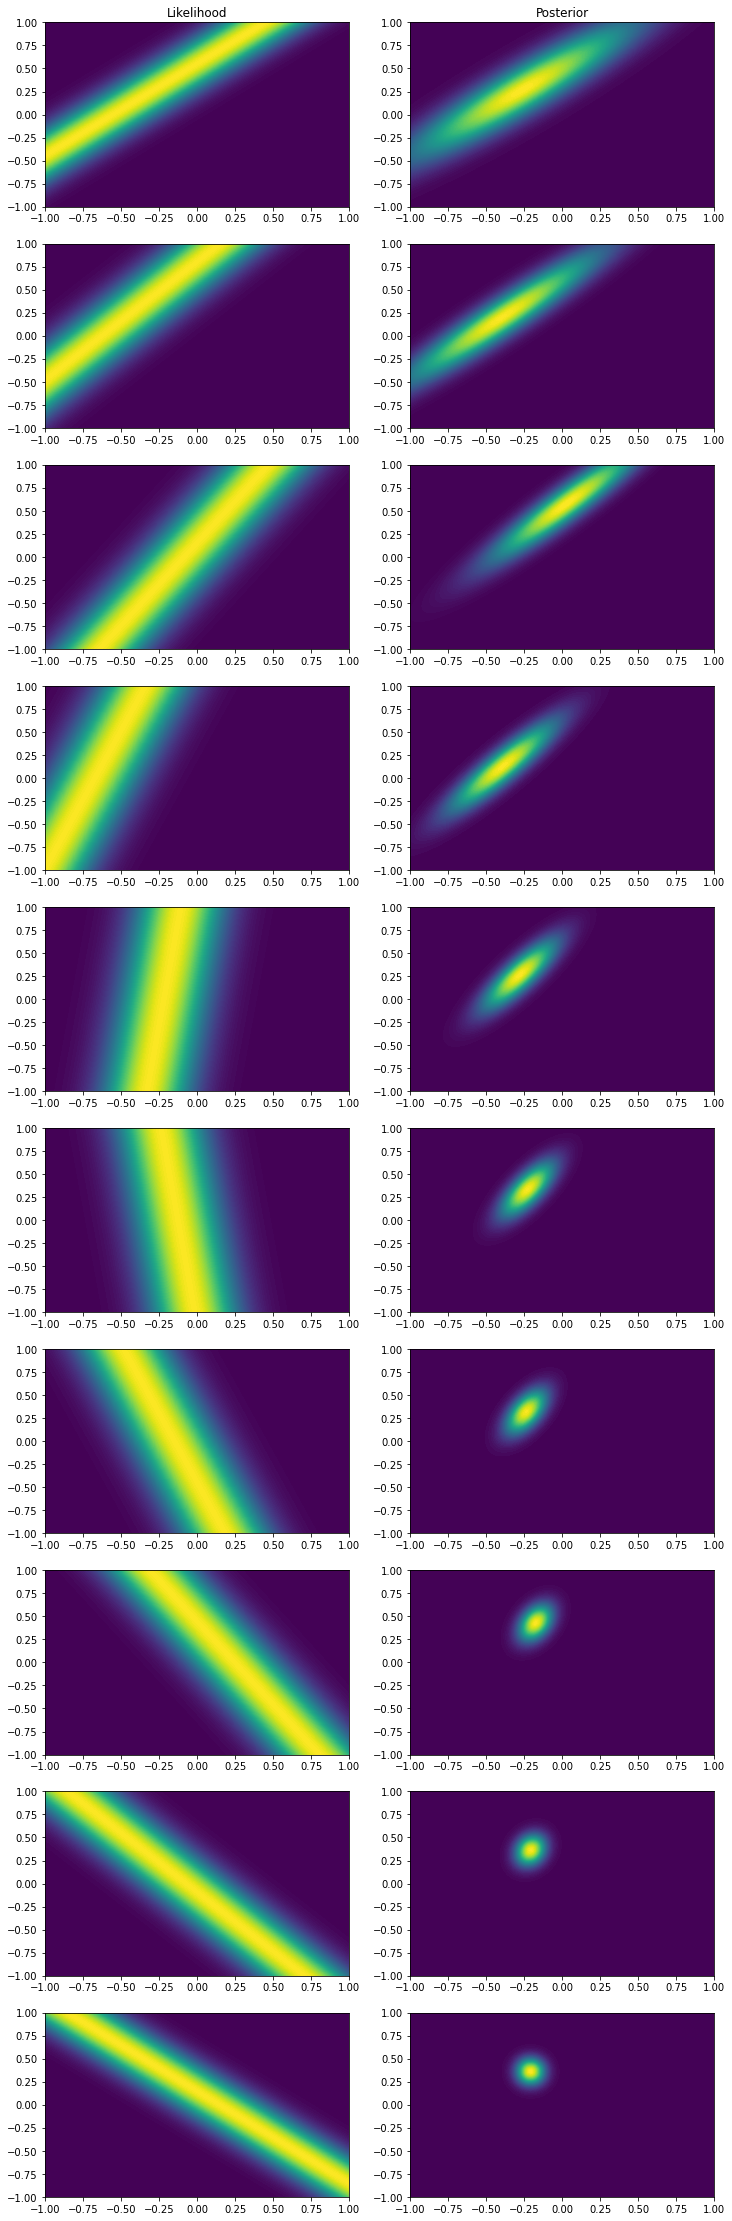

In [6]:
axis = 0
fig, axs = plt.subplots(10, 2, figsize=(12, 40))
axs[0, 0].set_title("Likelihood")
axs[0, 1].set_title("Posterior")
for i, j in zip(x_n, y):
  mle = likelihood(i, j, w0, w1)
  posterior = prior * mle
  prior = posterior
  axs[axis, 0].contourf(w0, w1, mle, 100)
  axs[axis, 1].contourf(w0, w1, posterior, 100)
  axis += 1
plt.show()